## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [151]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [152]:
df = pd.read_csv('ab_data.csv')
df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Use the cell below to find the number of rows in the dataset.

In [153]:
print('Number of rows in the dataset is {}'.format(df.shape[0]))

Number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [154]:
print('Number of unique user_id is {}'.format(len(df['user_id'].unique())))

Number of unique user_id is 290584


d. The proportion of users converted.

In [155]:
df_clean = df.copy()

# Subsetting to remove duplicated user_id.
df_clean = df_clean[np.logical_not(df_clean['user_id'].duplicated())]

# Proportion.
sum(df_clean.converted)/len(df_clean)

0.1195695564793657

e. The number of times the `new_page` and `treatment` don't match.

In [156]:
treatment_non_match = df.query("group == 'treatment'")['landing_page'].value_counts()[1]
new_page_non_match = df.query("landing_page == 'new_page'")['group'].value_counts()[1]

print("Number of times do no match is ", treatment_non_match + new_page_non_match)

Number of times do no match is  3893


f. Do any of the rows have missing values?

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [158]:
df.isna().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [159]:
df_draft1 =df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))]
df_draft2 =df[((df['group'] == 'control') & (df['landing_page'] == 'old_page'))]

# Appending by rows
df2 = df_draft1.append(df_draft2)

In [160]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [161]:
# Checking the all rows were removed, output should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [162]:
print('Number of unique user_ids in df2 is ', df2['user_id'].nunique())

Number of unique user_ids in df2 is  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [163]:
# Locating the duplicated user id
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [164]:
# Locating the duplicated user id
df2[df2['user_id'].duplicated()].head()

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [165]:
# Removing the duplicated user_id
df2 = df2[np.logical_not(df2.user_id.duplicated())]

# Testing.
print("Number of Duplicated user_id:", sum(df2.user_id.duplicated()))

Number of Duplicated user_id: 0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [166]:
# Converting proportion
p_all = df['converted'].mean()

# Printing.
print("Probability {}".format(p_all))

Probability 0.11965919355605512


b. Given that an individual was in the `control` group, what is the probability they converted?

In [167]:
control_group = len(df2.query('group=="control" and converted==1'))/len(df2.query('group=="control"'))
control_group

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [168]:
treatment_group = len(df2.query('group=="treatment" and converted==1'))/len(df2.query('group=="treatment"'))
treatment_group

0.11880806551510564

d. What is the probability that an individual received the new page?

In [169]:
(df2.landing_page == "new_page").mean()

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<blockquote>
Answer:
<br>
The probability of individual conversion of the individual is 0.1203863045004612 in the control group. The likelihood of person conversion is 0.11880724790277405 in the treatment community. It is obvious from the review that there is not any conversion between the new page and the old page. Since the conversion rate is identical in both cases, it is therefore important to consider other variables.
</br>
</blockquote>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$\begin{eqnarray}
H_1 &:& p_{new} &-& p_{old} > 0
\end{eqnarray}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [170]:
p_new = len(df2[df2['converted'] == 1]) / len(df2.index)

print("p_new: ", p_new)

p_new:  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? 

In [171]:
p_old = len(df2[df2['converted'] == 1]) / len(df2.index)

print("p_old: ", p_old)

p_old:  0.11959708724499628


In [172]:
# probablity under null
p=np.mean([p_old,p_new])
p

0.11959708724499628

In [173]:
# difference of p_new and p_old
p_diff=p_new-p_old
p_diff

0.0

<blockquote>
Answer:
<br>
It means that under null p_old is equal to the p_new.

c. What is $n_{new}$, the number of individuals in the treatment group?

In [174]:
n_new = df2.query('landing_page == "new_page"').shape[0]

print("n_new: ", n_new)

n_new:  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [175]:
n_old = df2.query('landing_page == "old_page"').shape[0]

print("n_old: ", n_old)

n_old:  145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [176]:
new_page_converted = np.random.choice([0, 1], size = n_new, p = [p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [177]:
old_page_converted = np.random.choice([0, 1], size = n_old, p = [p_old, 1 - p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [178]:
# Difference between p_new and p_old
obs_diff= new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.00038769451120190812

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [179]:
p_diffs = []

# Generating 10,000 samples with bootsrapping

for _ in range(10000):
    p_new1 = np.random.choice([1, 0],n_new,replace = True,p = [p_new, 1-p_new])
    p_old1 = np.random.choice([1, 0],n_old,replace = True,p = [p_old, 1-p_old])
    p_new2 = p_new1.mean()
    p_old2 = p_old1.mean()
    p_diffs.append(p_new2-p_old2)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

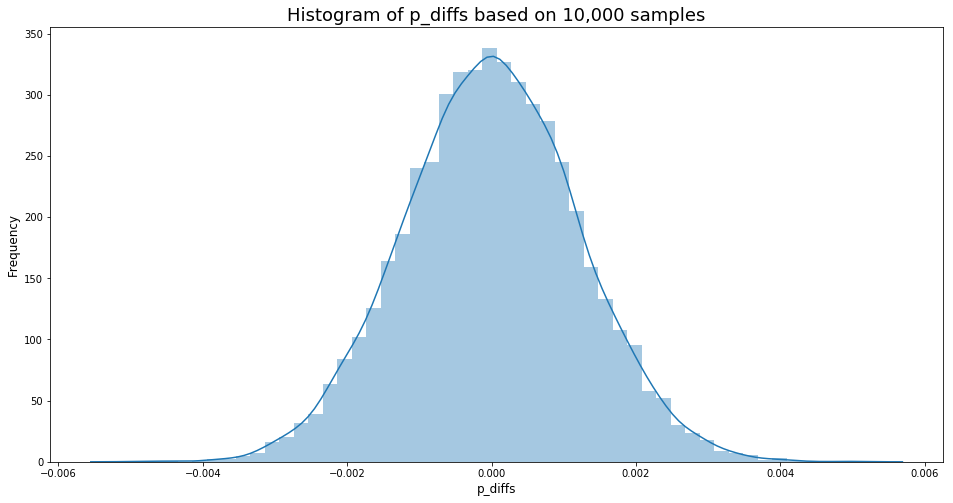

In [180]:
plt.figure(figsize = [16,8])
sns.distplot(p_diffs);
plt.title('Histogram of p_diffs based on 10,000 samples', fontsize = 18)
plt.xlabel('p_diffs', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.show()

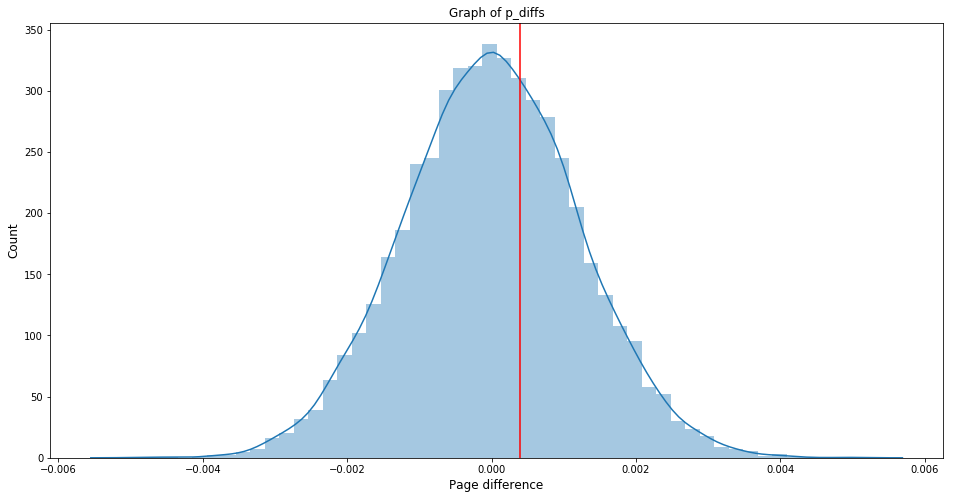

In [181]:
plt.figure(figsize = [16,8])
sns.distplot(p_diffs);
plt.title('Graph of p_diffs')
plt.xlabel('Page difference', fontsize = 12)
plt.ylabel('Count', fontsize = 12) 
plt.axvline(x= obs_diff, color='r');
plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [182]:
var1 = df2[df2['landing_page'] == 'new_page']
var1=var1['converted'].mean()
var2 = df2[df2['landing_page'] == 'old_page']
var2 = var2['converted'].mean()
actual_diff = var1-var2
count = 0
for i in p_diffs:
    if i> actual_diff:
        count = count+1
        
print (count/(len(p_diffs)))

0.9048


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<blockquote>
Answer:
<br>    
The value of the estimated value is p-value. In order to support the null hypothesis, p-value should be greater than the proposed p-value. We measure that almost 90 % of the population is above the actual gap, which means that the new page is not doing any better than the old page. The new page is worse than the old page, so we can stick to the null hypothesis since p-value is high.
</blockquote>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [183]:
len(df2.query('landing_page == "old_page"').landing_page)

145274

In [184]:
import statsmodels.api as sm

convert_old = len(df2.query('converted == 1 and landing_page == "old_page"').converted)
convert_new = len(df2.query('converted == 1 and landing_page == "new_page"').query('converted == 1').converted)
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

print("convert_old:", convert_old)
print("n_old:", n_old)
print("convert_new:", convert_new)
print("n_new:", n_new)

convert_old: 17489
n_old: 145274
convert_new: 17264
n_new: 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

<blockquote>
Answer:
    
#### Preparation
The function for proportions_ztest is:

    proportions_ztest(count, nobs, value=None, alternative= 'larger', prop_var=False)
    
For this project:

- alternative = 'larger';
- number of success are 17264 and 17489 , and;
- number of trials are 145310 and 145274.

count = [17264, 17489]
nobs = [145310, 145274]
</blockquote>


In [185]:
count = [convert_old, convert_new]

nobs = [n_new, n_old]

alternative = 'smaller'

z_score, p_value = sm.stats.proportions_ztest(count = count, nobs = nobs, alternative = alternative)

print("z_score: {}\np_value: {}".format(z_score, p_value))

z_score: 1.2616957421858055
p_value: 0.8964708551967226


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [186]:
from scipy.stats import norm

cdf = norm.cdf(z_score) #how significant our z_score is
ppf = norm.ppf(1-(0.05)) #critical value of 95% confidence


print("cdf: {}\nppf: {}".format(cdf, ppf))
print("p_value:", round(p_value,4))
print("z_score:", z_score)
print("ppf:", ppf) # As expected given alpha = 0.05 the ppf is 1.6448
print("\nz_score > ppf :", z_score > ppf) 

cdf: 0.8964708551967226
ppf: 1.6448536269514722
p_value: 0.8965
z_score: 1.26169574219
ppf: 1.64485362695

z_score > ppf : False


<blockquote>
Answer:
<br>
In terms of the p-value, all values (from j and k items) are very similar (0.90) and there is clear proof that the new page and the old page do not differ. <br>

In other words, there is no evidence that the new_page had better results than the existing one.

Comparing the findings of the j and k parts, all outcomes are consistent with the same assumptions.

The z-score is less than ppf, which means that the null hypothesis ( H0) is not denied.

</blockquote>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

In [187]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


> Since the goal is to predict a conversion or not (a classification), the Logistic Regression is more accurate to do so.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [188]:
# Creating a column for intercepting values
df2['intercept'] = 1

#Createing the dummy variables column
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [189]:
import statsmodels.api as sm
model=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results=model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [190]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-09-23 14:12 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

Answer:
  
     Regarding the p-value associate with ab_page, unfortunately, the p-value is greater than the α (assuming 0.05) and for this reason we fail to reject the null hypothesis (H0). Put differently, there is no statistical evidence that the new page has better performance than the old version.
    
In Logistic Regression:



      
\begin{align*}
H_1 : p_{new} - p_{old} != 0
\end{align*}


As mentioned in Part II, I have posed in equation (1) these hypotheses:

      
\begin{align*}
H_0 : p_{new} - p_{old} <= 0
\end{align*}
\begin{align*}
H_1 : p_{new} - p_{old} > 0
\end{align*}


</blockquote>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<blockquote>
Answer:

Additional variables should be applied to the regression models that can also affect transitions. The downside is that we do not know if our additional consideration can affect the outcome in which direction. As our additional factor varies from time to time on the basis of an additional factor.
</blockquote>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [191]:
# Loading the Countries Dataframe.
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [192]:
# Using Inner Join Method for joining two datasets
new = countries.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [193]:
#adding dummy variables with 'CA' as the baseline
new[['US', 'UK']] = pd.get_dummies(new['country'])[['US', "UK"]]
new['US_ab_page'] = new['US']*new['ab_page']
new['UK_ab_page'] = new['UK']*new['ab_page']
new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1


In [194]:
logit3 = sm.Logit(new['converted'], new[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'US_ab_page']])
logit3

In [195]:
# Checking the Results
result3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion. Create the necessary additional columns, and fit the new model.



In [196]:
result3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                 Logit              No. Iterations:     6.0000     
Dependent Variable:    converted          Pseudo R-squared:   0.000      
Date:                  2020-09-23 14:12   AIC:                212782.5603
No. Observations:      290584             BIC:                212835.4585
Df Model:              4                  Log-Likelihood:     -1.0639e+05
Df Residuals:          290579             LL-Null:            -1.0639e+05
Converged:             1.0000             Scale:              1.0000     
-------------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|      [0.025       0.975]   
-------------------------------------------------------------------------
intercept  -2.0366      0.0280 -72.6176 0.0000       -2.0916      -1.9817
ab_page    -0.0018      0.0209  -0.0861 0.9313       -0.0427       0.0391
US          0.0501      0.0297   1.6912 0.0908       -0.0080       0.1083
UK          0.0507      0.0284   1.7860 0.0741       -0.0049       0.1064
US_ab_page -0.0094 704237.3061  -0.0000 1.0000 -1380279.7660 1380279.7472
US_ab_page -0.0094 704237.3061  -0.0000 1.0000 -1380279.7660 1380279.7472
=========================================================================

"""

### CONCLUSION

<blockquote>

At the end of the day, we can conclude that there is no significant p-value, so we would not deny the null and assume that there is no data to indicate that there is an association between the nation and the page got that determines whether or not a person converts.

In the bigger perspective, based on the information available, we do not have sufficient evidence to conclude that the new page results in more conversions than the old one.
</blockquote>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [197]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0